# Predictive Maintenance for Manufacturing Equipment

## Life cycle of Machine learning Project

1.Understanding the Problem Statement<br>
2.Data Collection<br>
3.Data Checks to perform<br>
4.Exploratory data analysis<br>
5.Data Pre-Processing<br>
6.Model Training<br>
7.Choose best model<br>



## 1.Problem Statement

The goal is to develop a predictive maintenance model that can predict equipment
failures before they occur. The dataset includes sensor readings and maintenance
logs from a variety of machines.

## 2.Data Collection

### 2.1 Importing the Libraries

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
df=pd.read_csv('Csv_Files/Final_Project_dataset.csv')

### 2.2 Showing the First Five Record

In [268]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### 2.3 Shape oF the Dataset

In [269]:
print("Total No. oF Rows in the DataFrame:",df.shape[0])
print("Total No. oF Columns in the DataFrame:",df.shape[1])

Total No. oF Rows in the DataFrame: 10000
Total No. oF Columns in the DataFrame: 10


### 2.4 Columns oF the Dataset

In [270]:
print("Columns oF the DataFrame:",df.columns)

Columns oF the DataFrame: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


## 3.DataChecks to PerForm

1.Check Missing Values<br>
2.Check Duplicates<br>
3.Check Datatype<br>
4.Check the number  of unique values oF each Column<br>
5.Check the Statistics oF dataset<br>
6.Check the various categories present in the different Categorical Column<br>

### 3.1.Check Missing Values

In [271]:
for i in df.columns:
    print('Total no. oF missing values in the "{}" column: {}'.format(i,df[i].isnull().sum()))

Total no. oF missing values in the "UDI" column: 0
Total no. oF missing values in the "Product ID" column: 0
Total no. oF missing values in the "Type" column: 0
Total no. oF missing values in the "Air temperature [K]" column: 0
Total no. oF missing values in the "Process temperature [K]" column: 0
Total no. oF missing values in the "Rotational speed [rpm]" column: 0
Total no. oF missing values in the "Torque [Nm]" column: 0
Total no. oF missing values in the "Tool wear [min]" column: 0
Total no. oF missing values in the "Target" column: 0
Total no. oF missing values in the "Failure Type" column: 0


### 3.2.Check Duplicates

In [272]:
print("Total no. oF duplicate values in the DataFrame: {}".format(df.duplicated().sum()))

Total no. oF duplicate values in the DataFrame: 0


### 3.3 Check datatypes

In [273]:
for i in df.columns:
    print('Datatype oF "{}" column: {}'.format(i,df[i].dtype))

Datatype oF "UDI" column: int64
Datatype oF "Product ID" column: object
Datatype oF "Type" column: object
Datatype oF "Air temperature [K]" column: float64
Datatype oF "Process temperature [K]" column: float64
Datatype oF "Rotational speed [rpm]" column: int64
Datatype oF "Torque [Nm]" column: float64
Datatype oF "Tool wear [min]" column: int64
Datatype oF "Target" column: int64
Datatype oF "Failure Type" column: object


### 3.4 Check the number oF unique values oF each column

In [274]:
for i in df.columns:
    print('Unique no. oF values in the "{}" column: {}'.format(i,df[i].nunique()))

Unique no. oF values in the "UDI" column: 10000
Unique no. oF values in the "Product ID" column: 10000
Unique no. oF values in the "Type" column: 3
Unique no. oF values in the "Air temperature [K]" column: 93
Unique no. oF values in the "Process temperature [K]" column: 82
Unique no. oF values in the "Rotational speed [rpm]" column: 941
Unique no. oF values in the "Torque [Nm]" column: 577
Unique no. oF values in the "Tool wear [min]" column: 246
Unique no. oF values in the "Target" column: 2
Unique no. oF values in the "Failure Type" column: 6


### 3.5 Check the Statistics oF Dataset

In [275]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


### 3.7 Exploring the Data by Count

In [276]:
Categorical_Cols=[Feature for Feature in df.columns if df[Feature].dtypes=='O']
print('Categorical_Cols',Categorical_Cols)

numerical_Cat_Cols=[Feature for Feature in df.columns if df[Feature].dtypes!='O' and df[Feature].nunique()<25]
print('numerical_Cat_Cols',numerical_Cat_Cols)

numerical_Cols=[Feature for Feature in df.columns if df[Feature].dtypes!='O' and Feature not in numerical_Cat_Cols]
print('numerical_Cols',numerical_Cols)

Categorical_Cols ['Product ID', 'Type', 'Failure Type']
numerical_Cat_Cols ['Target']
numerical_Cols ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [277]:
for i in numerical_Cat_Cols:
    print('Unique value oF the {} Column: {}'.format(i,df[i].unique()))

Unique value oF the Target Column: [0 1]


In [278]:
for i in Categorical_Cols:
    print('Unique value oF the {} Column: {}'.format(i,df[i].unique()))

Unique value oF the Product ID Column: ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
Unique value oF the Type Column: ['M' 'L' 'H']
Unique value oF the Failure Type Column: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [279]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

### 3.8.Exploring the Data by Visualization

In [280]:
''' 
1. Bar Plot--->Comparision
2. Box Plot--->Outlier
3. Line Plot--->Relationship
4. Histplot--->Distribution
5. Countplot--->Counting values in Categories '''

#https://github.com/krishnaik06/mlproject/blob/main/notebook/1%20.%20EDA%20STUDENT%20PERFORMANCE%20.ipynb

' \n1. Bar Plot--->Comparision\n2. Box Plot--->Outlier\n3. Line Plot--->Relationship\n4. Histplot--->Distribution\n5. Countplot--->Counting values in Categories '

In [281]:
total_Values=df.groupby(['Target','Failure Type']).size().reset_index().rename(columns={0:'Total'})

In [282]:
total_Values

,Target,Failure Type,Total
0,0,No Failure,9643
1,0,Random Failures,18
2,1,Heat Dissipation Failure,112
3,1,No Failure,9
4,1,Overstrain Failure,78
5,1,Power Failure,95
6,1,Tool Wear Failure,45


In [283]:
df1=df.copy()

<Axes: xlabel='Type', ylabel='count'>

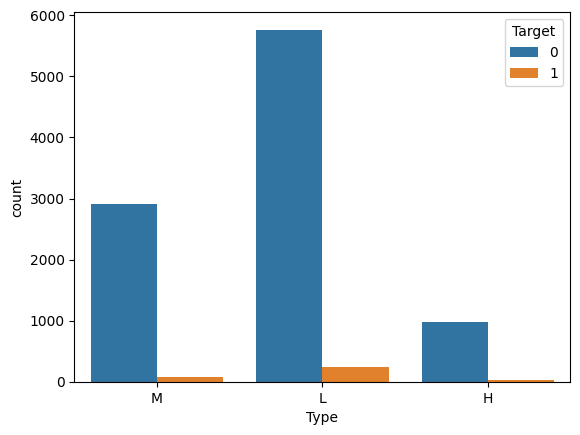

In [284]:
sns.countplot(data=df,x='Type',hue='Target')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Random Failures'),
  Text(2, 0, 'Heat Dissipation Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Power Failure'),
  Text(5, 0, 'Tool Wear Failure')])

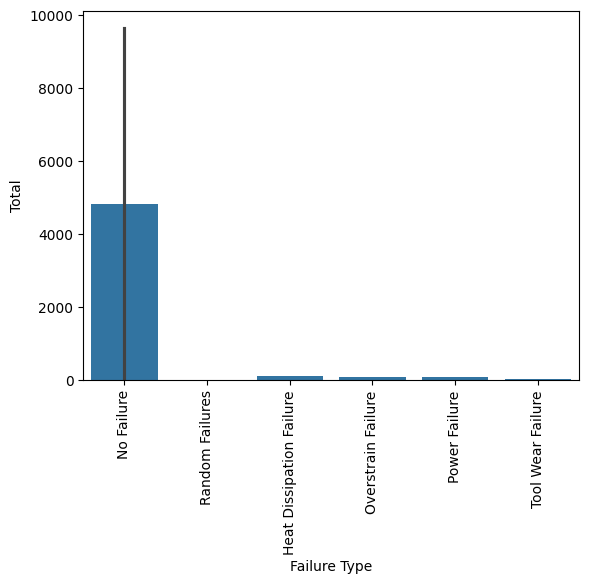

In [285]:
sns.barplot(data=total_Values,x='Failure Type',y='Total')
plt.xticks(rotation=90)

In [286]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

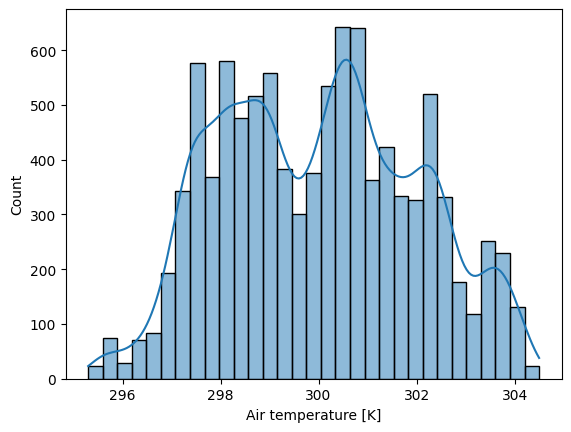

In [287]:
sns.histplot(data=df,x='Air temperature [K]',kde=True)

In [288]:
print(round(df1['Air temperature [K]'].mean()))
print(round(df1['Air temperature [K]'].median()))

300
300


<Axes: xlabel='Process temperature [K]', ylabel='Count'>

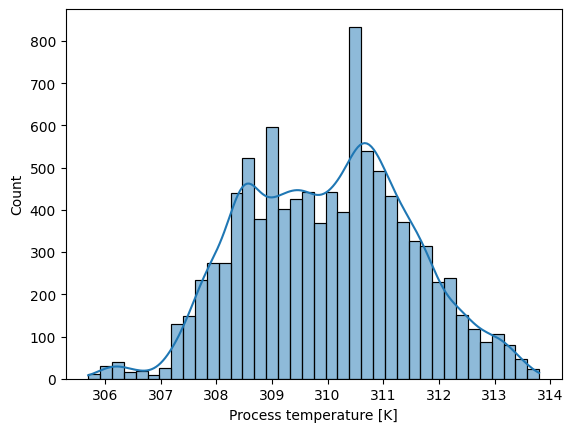

In [289]:
sns.histplot(data=df,x='Process temperature [K]',kde=True)

In [290]:
print(round(df1['Process temperature [K]'].mean()))
print(round(df1['Process temperature [K]'].median()))

310
310


<Axes: xlabel='Torque [Nm]', ylabel='Count'>

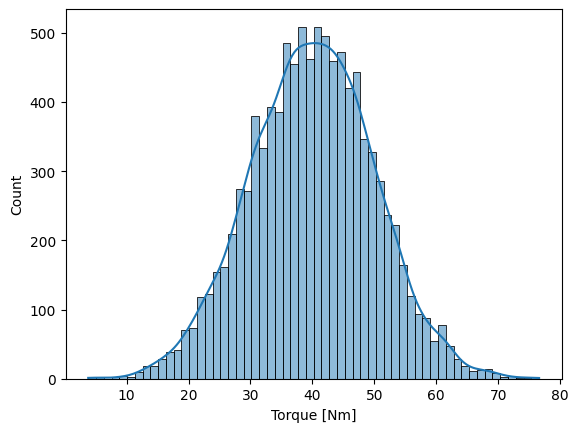

In [291]:
sns.histplot(data=df,x='Torque [Nm]',kde=True)

In [292]:
print(round(df1['Torque [Nm]'].mean()))
print(round(df1['Torque [Nm]'].median()))

40
40


<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

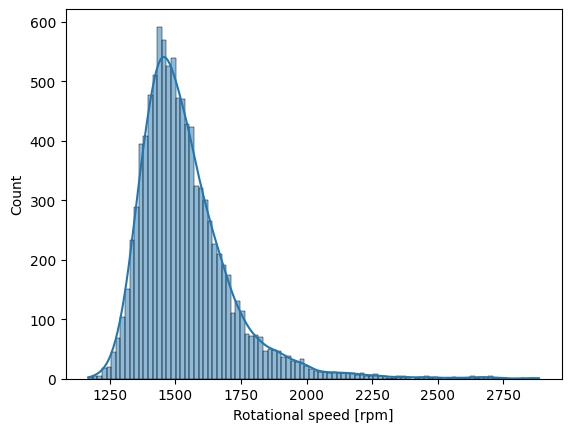

In [293]:
sns.histplot(data=df,x='Rotational speed [rpm]',kde=True)

In [294]:
print(round(df1['Rotational speed [rpm]'].mean()))
print(round(df1['Rotational speed [rpm]'].median()))

1539
1503


<Axes: xlabel='Tool wear [min]', ylabel='Count'>

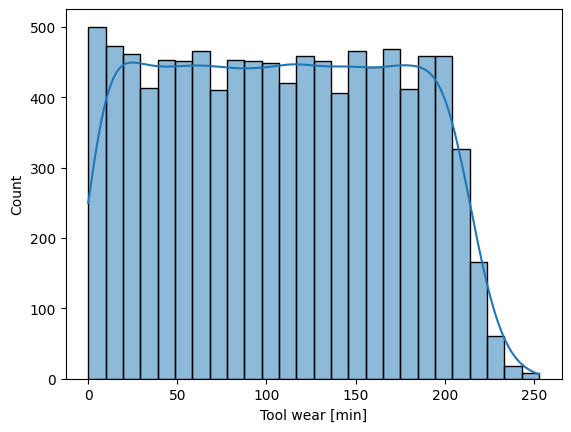

In [295]:
sns.histplot(data=df,x='Tool wear [min]',kde=True)

In [296]:
print(round(df1['Tool wear [min]'].mean()))
print(round(df1['Tool wear [min]'].median()))

108
108


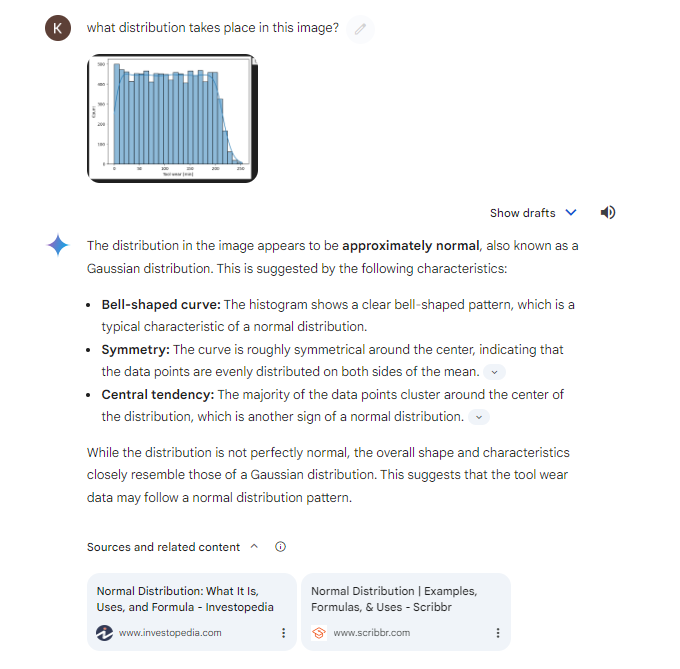

In [297]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

In [298]:
# Numerical_Cols=['Air temperature [K]','Process temperature [K]','Torque [Nm]','Rotational speed [rpm]']
# for Col in Numerical_Cols: 
Col='Rotational speed [rpm]'

print("Column Name:",Col)   
df1[Col+"_LOG"]=np.log(df1[Col])
print(f"Skewness before Log normal Transformation: {df1[Col].skew():.5f}")
print(df1[Col].mean(),df1[Col].median())
print(f"Skewness after Log normal Transformation: {df1[Col+"_LOG"].skew():.5f}")
print(df1[Col+"_LOG"].mean(),df1[Col+"_LOG"].median())
print("------------------------------------")

df1[Col+"_SQRT"]=np.sqrt(df1[Col])
print(f"Skewness before Square normal Transformation: {df1[Col].skew():.5f}")
print(df1[Col].mean(),df1[Col].median())
print(f"Skewness after Square Root Transformation: {df1[Col+"_SQRT"].skew():.5f}")
print(df1[Col+"_SQRT"].mean(),df1[Col+"_SQRT"].median())
print("------------------------------------")

df1[Col+"_RP"]=1/df1[Col]
print(f"Skewness before Reciprocal normal Transformation: {df1[Col].skew():.5f}")
print(df1[Col].mean(),df1[Col].median())
print(f"Skewness after Reciprocal Transformation: {df1[Col+"_RP"].skew():.5f}")
print(df1[Col+"_RP"].mean(),df1[Col+"_RP"].median())
print("------------------------------------")

df1[Col+"_EXP"]=df1[Col]**(1/1.2)
print(f"Skewness before Exponential normal Transformation: {df1[Col].skew():.5f}")
print(df1[Col].mean(),df1[Col].median())
print(f"Skewness after Exponential Transformation: {df1[Col+"_EXP"].skew():.5f}")
print(df1[Col+"_EXP"].mean(),df1[Col+"_EXP"].median())
print("------------------------------------")

df1[Col+"_YJ"], _ = stats.yeojohnson(df1[Col])
print(f"Skewness before Yeo-Johnson Transformation: {df1[Col].skew():.5f}")
print(df1[Col].mean(),df1[Col].median())
print(f"Skewness after Yeo-Johnson Transformation: {df1[Col+"_YJ"].skew():.5f}")
print(df1[Col+"_YJ"].mean(),df1[Col+"_YJ"].median())
print("------------------------------------")

df1[Col+"_BX"],parameters= stats.boxcox(df1[Col])
print(f"Skewness before BoxCox Transformation: {df1[Col].skew():.5f}")
print(df1[Col].mean(),df1[Col].median())
print(f"Skewness after BoxCox Transformation: {df1[Col+"_BX"].skew():.5f}")
print(df1[Col+"_BX"].mean(),df1[Col+"_BX"].median())
print("------------------------------------")


quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df1[Col+"_QT"] = quantile_transformer.fit_transform(df1[Col].values.reshape(-1, 1)).flatten()
print(f"Skewness before Quantile Transformation: {df1[Col].skew():.5f}")
print(df1[Col].mean(),df1[Col].median())
print(f"Skewness after Quantile Transformation: {df1[Col+"_QT"].skew():.5f}")
print(df1[Col+"_QT"].mean(),df1[Col+"_QT"].median())

print("=================================================")


Column Name: Rotational speed [rpm]
Skewness before Log normal Transformation: 1.99317
1538.7761 1503.0
Skewness after Log normal Transformation: 1.30937
7.332672593947479 7.315218389752975
------------------------------------
Skewness before Square normal Transformation: 1.99317
1538.7761 1503.0
Skewness after Square Root Transformation: 1.62441
39.16628012639403 38.768543949960254
------------------------------------
Skewness before Reciprocal normal Transformation: 1.99317
1538.7761 1503.0
Skewness after Reciprocal Transformation: -0.79892
0.0006574465399363462 0.0006653359946773121
------------------------------------
Skewness before Exponential normal Transformation: 1.99317
1538.7761 1503.0
Skewness after Exponential Transformation: 1.86355
452.4784481621054 444.0847065678485
------------------------------------
Skewness before Yeo-Johnson Transformation: 1.99317
1538.7761 1503.0
Skewness after Yeo-Johnson Transformation: 0.00000
0.3158726115006841 0.3158726115005622
------------

<Axes: xlabel='Rotational speed [rpm]_YJ', ylabel='Count'>

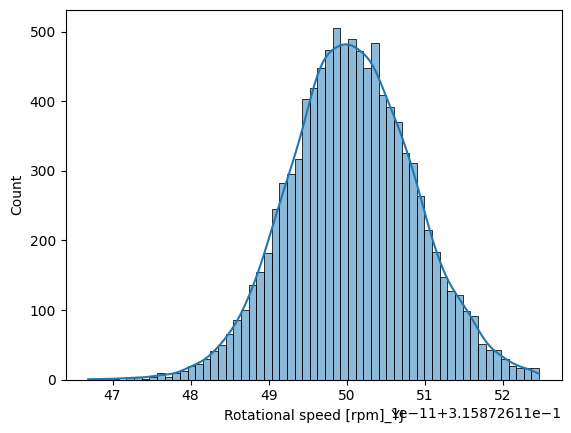

In [299]:
sns.histplot(data=df1,x='Rotational speed [rpm]_YJ',kde=True)

In [300]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'Rotational speed [rpm]_LOG',
       'Rotational speed [rpm]_SQRT', 'Rotational speed [rpm]_RP',
       'Rotational speed [rpm]_EXP', 'Rotational speed [rpm]_YJ',
       'Rotational speed [rpm]_BX', 'Rotational speed [rpm]_QT'],
      dtype='object')

In [301]:
df1.drop(['Rotational speed [rpm]_LOG',
       'Rotational speed [rpm]_SQRT', 'Rotational speed [rpm]_RP',
       'Rotational speed [rpm]_EXP', 
       'Rotational speed [rpm]_BX', 'Rotational speed [rpm]_QT','Rotational speed [rpm]'],axis=1,inplace=True)

In [302]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rpm]_YJ'],
      dtype='object')

In [303]:
df1.dtypes

Type                          object
Air temperature [K]          float64
Process temperature [K]      float64
Torque [Nm]                  float64
Tool wear [min]                int64
Target                         int64
Failure Type                  object
Rotational speed [rpm]_YJ    float64
dtype: object

Column Name: Air temperature [K]


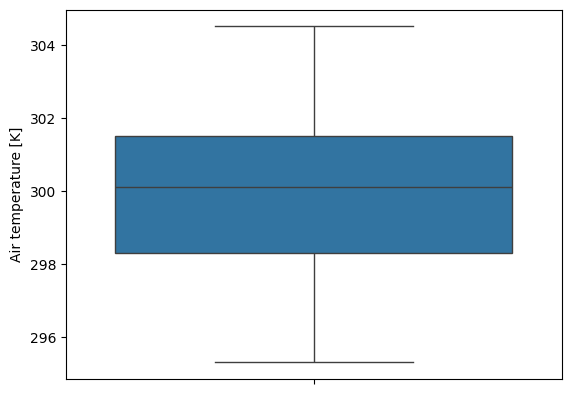

Column Name: Process temperature [K]


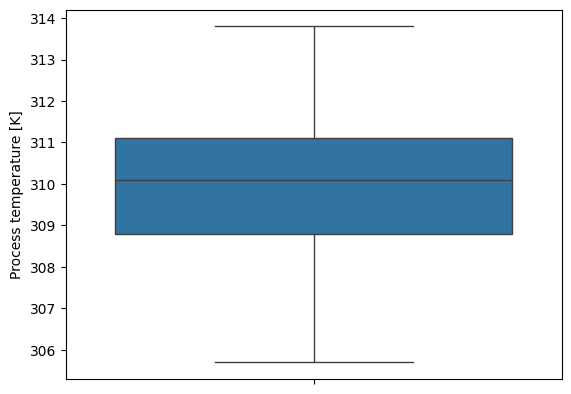

Column Name: Torque [Nm]


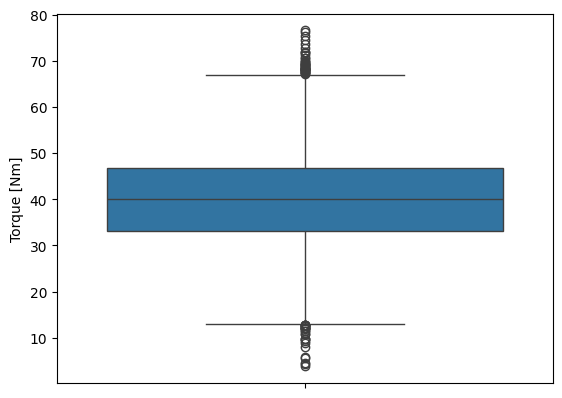

Column Name: Tool wear [min]


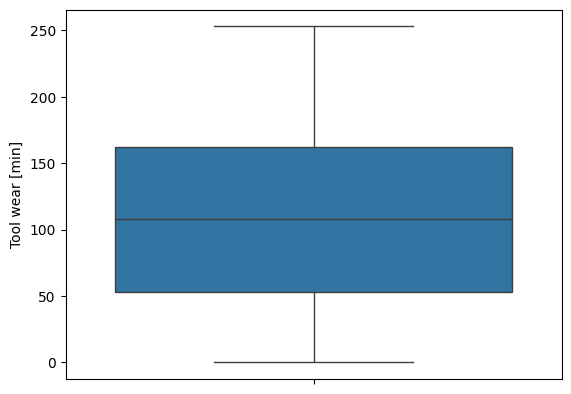

Column Name: Rotational speed [rpm]_YJ


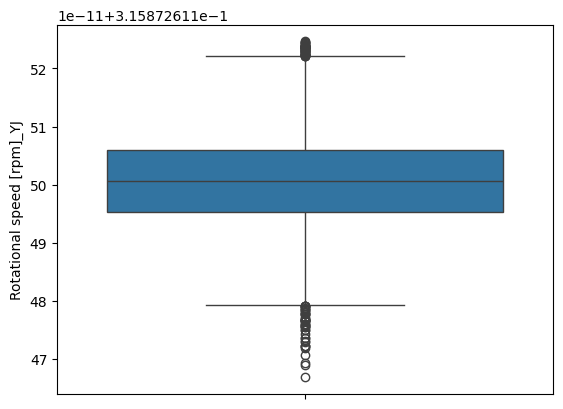

In [304]:
num_Cols=['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]','Rotational speed [rpm]_YJ']
for i in num_Cols:
    print("Column Name:",i)
    sns.boxplot(df1[i])
    plt.show()

In [305]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rpm]_YJ'],
      dtype='object')

In [306]:
# def outlier(df,Col):
#     uppper_boundary=df[Col].mean() + 3* df[Col].std()
#     lower_boundary=df[Col].mean() - 3* df[Col].std()
#     df[Col] = df[Col].clip(lower_boundary, uppper_boundary)
#     # print(lower_boundary), print(uppper_boundary),print(df[Col].mean())

# print(outlier(df1,'Rotational speed [rpm]_YJ'))
# print(outlier(df1,'Torque [Nm]'))

In [307]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    dict_VALUE={'IQR':iqr,'UPPER_TH':upper_threshold,'LOWER_TH':lower_threshold}
    return dict_VALUE

print(outlier(df1,'Rotational speed [rpm]_YJ'))
print(outlier(df1,'Torque [Nm]'))

{'IQR': 1.0696998842263383e-11, 'UPPER_TH': 0.31587261152209106, 'LOWER_TH': 0.31587261147930307}
{'IQR': 13.599999999999994, 'UPPER_TH': 67.19999999999999, 'LOWER_TH': 12.800000000000011}


Column Name: Air temperature [K]


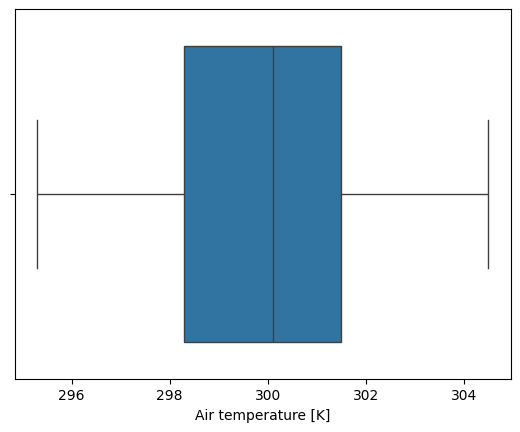

Column Name: Process temperature [K]


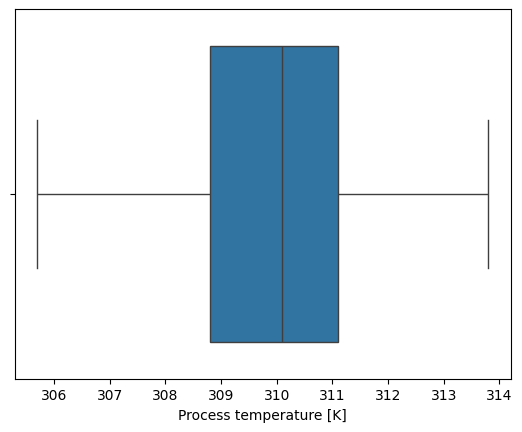

Column Name: Torque [Nm]


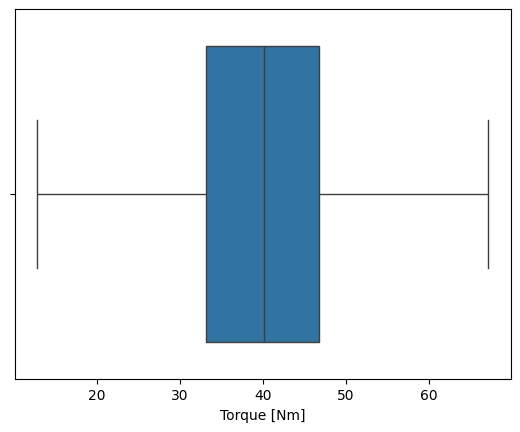

Column Name: Tool wear [min]


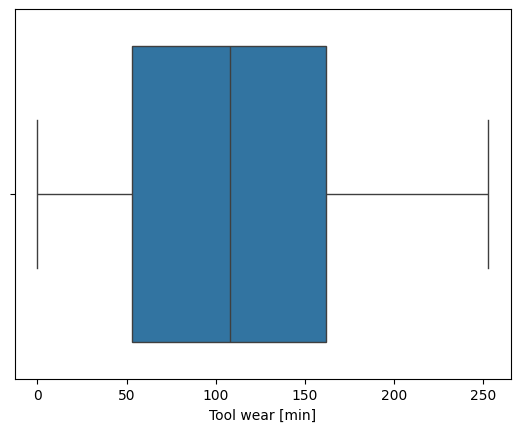

Column Name: Rotational speed [rpm]_YJ


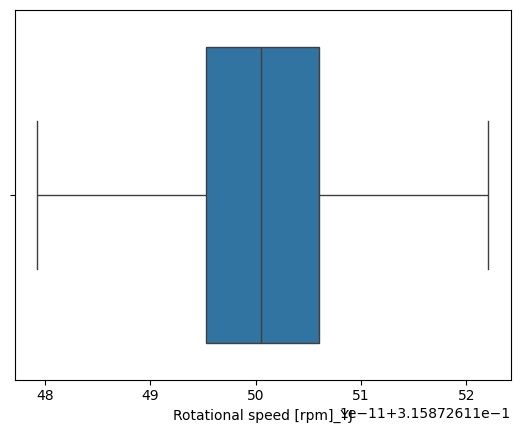

In [308]:
for i in num_Cols:
    print("Column Name:",i)
    sns.boxplot(df1[i],orient='h')
    plt.show()

### Feature Encoding

In [309]:
df1.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [310]:
df2=df1.copy()

In [311]:
df2['Product Type']=df2['Type'].map({'L':1,'M':2,'H':3})

In [312]:
df2.drop('Type',axis=True,inplace=True)

In [313]:
df2.columns

Index(['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rpm]_YJ', 'Product Type'],
      dtype='object')

In [314]:
df2.dtypes

Air temperature [K]          float64
Process temperature [K]      float64
Torque [Nm]                  float64
Tool wear [min]                int64
Target                         int64
Failure Type                  object
Rotational speed [rpm]_YJ    float64
Product Type                   int64
dtype: object

In [315]:
df2['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [316]:
df2['Failure_Type']=df2['Failure Type'].map({'No Failure':0,'Power Failure':1,'Tool Wear Failure':2,'Overstrain Failure':3, 'Random Failures':4,'Heat Dissipation Failure':5})
df2['Failure_Type'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [317]:
df2.groupby(['Failure Type','Failure_Type']).size()

Failure Type              Failure_Type
Heat Dissipation Failure  5                112
No Failure                0               9652
Overstrain Failure        3                 78
Power Failure             1                 95
Random Failures           4                 18
Tool Wear Failure         2                 45
dtype: int64

In [318]:
df2.drop('Failure Type',axis=1,inplace=True)

In [319]:
df2.columns

Index(['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Rotational speed [rpm]_YJ',
       'Product Type', 'Failure_Type'],
      dtype='object')

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,auc,roc_curve,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,auc,roc_curve,classification_report


X=df2.drop(['Target'],axis=1)
y=df2['Target']

In [321]:
SM=SMOTE(random_state=42)
X_resampled,y_resampled=SM.fit_resample(X,y)

In [322]:
df_resample=pd.DataFrame(data=y_resampled)
df_resample['Target'].value_counts()

Target
0    9661
1    9661
Name: count, dtype: int64

In [323]:
Scaler1=StandardScaler()
Scaler2=MinMaxScaler()


X_Scaled1=Scaler1.fit_transform(X_resampled)
X_Scaled2=Scaler2.fit_transform(X_resampled)

In [324]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled2,y_resampled,test_size=0.2,random_state=42)

1.Gradient Boosting

In [325]:
Gradient_model = GradientBoostingClassifier(random_state=42)
Gradient_model.fit(X_train, y_train)


y_pred1 = Gradient_model.predict(X_test)   
accuracy = accuracy_score(y_test, y_pred1)

# accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy= accuracy_score(y_test, y_pred1)
precision=precision_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)
print("Scaled 2")
print(confusion_matrix(y_test,y_pred1))

Scaled 2
[[1932    2]
 [  30 1901]]


In [326]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1934
           1       1.00      0.98      0.99      1931

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [327]:
print('Accuracy on Balanced Dataset For Gradient_Boosting', accuracy)
print('Precision on Balanced Dataset For Gradient_Boosting',precision)
print('Recall on Balanced Dataset For Gradient_Boosting',recall)

Accuracy on Balanced Dataset For Gradient_Boosting 0.9917205692108667
Precision on Balanced Dataset For Gradient_Boosting 0.998949027850762
Recall on Balanced Dataset For Gradient_Boosting 0.9844640082858622


In [334]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred1)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9917149410612351


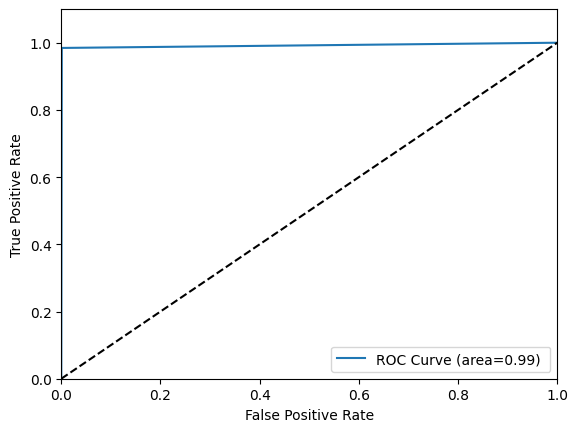

In [335]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

2.Random Forest


In [328]:
Random_Forest_model = RandomForestClassifier(random_state=42)
Random_Forest_model.fit(X_train, y_train)


y_pred2 = Random_Forest_model.predict(X_test)   
accuracy = accuracy_score(y_test, y_pred2)
precision=precision_score(y_test,y_pred2)
recall=recall_score(y_test,y_pred2)
print("Scaled2")
print(confusion_matrix(y_test,y_pred2))

Scaled2
[[1928    6]
 [  10 1921]]


In [329]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1934
           1       1.00      0.99      1.00      1931

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



In [330]:
print('Accuracy on Balanced Dataset For Random_Forest_Model', accuracy)
print('Precision on Balanced Dataset For Random_Forest_Model',precision)
print('Recall on Balanced Dataset For Random_Forest_Model',recall)

Accuracy on Balanced Dataset For Random_Forest_Model 0.9958602846054334
Precision on Balanced Dataset For Random_Forest_Model 0.9968863518422418
Recall on Balanced Dataset For Random_Forest_Model 0.9948213360952874


In [332]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred2)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9958594788025559


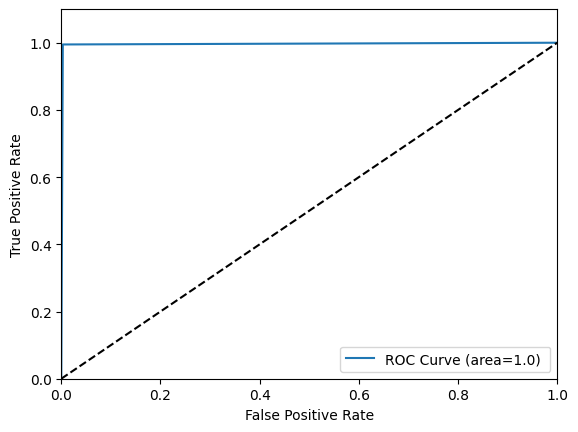

In [333]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### I Chose Gradient Boosting model because it metrics values are good

In [336]:
from sklearn.model_selection import GridSearchCV
 
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [3, 6, 9],
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Random_Forest_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
 
# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)
 
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
 
# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)
 
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
 
# Print the results
print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

KeyboardInterrupt: 